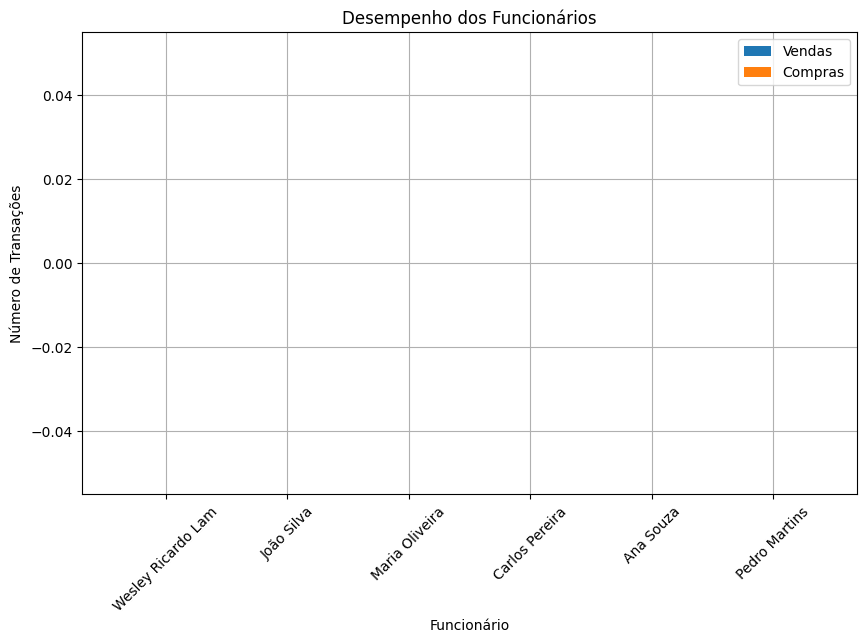

In [1]:
# desempenho_funcionarios.ipynb

import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
funcionarios_df = pd.read_csv('../data/extracted/funcionarios.csv')
movimentacoes_df = pd.read_csv('../data/extracted/movimentacoes.csv')

# Analisar número de vendas/compras por funcionário
movimentacoes_df['tipo_movimentacao'] = movimentacoes_df['tipo_movimentacao'].str.lower()
vendas = movimentacoes_df[movimentacoes_df['tipo_movimentacao'] == 'S']
compras = movimentacoes_df[movimentacoes_df['tipo_movimentacao'] == 'E']

vendas_por_funcionario = vendas['funcionario_id'].value_counts().reset_index()
compras_por_funcionario = compras['funcionario_id'].value_counts().reset_index()

vendas_por_funcionario.columns = ['funcionario_id', 'num_vendas']
compras_por_funcionario.columns = ['funcionario_id', 'num_compras']

desempenho_funcionarios_df = funcionarios_df.merge(vendas_por_funcionario, left_on='id', right_on='funcionario_id', how='left').merge(compras_por_funcionario, left_on='id', right_on='funcionario_id', how='left').fillna(0)

# Plotar desempenho
plt.figure(figsize=(10, 6))
plt.bar(desempenho_funcionarios_df['nome'], desempenho_funcionarios_df['num_vendas'], label='Vendas')
plt.bar(desempenho_funcionarios_df['nome'], desempenho_funcionarios_df['num_compras'], bottom=desempenho_funcionarios_df['num_vendas'], label='Compras')
plt.title('Desempenho dos Funcionários')
plt.xlabel('Funcionário')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Salvar resultados em CSV
desempenho_funcionarios_df.to_csv('../data/processed/desempenho_funcionarios.csv', index=False)
